<a href="https://colab.research.google.com/github/boropx999/hello-world/blob/main/10Food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential,preprocessing
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)

Mounted at /content/gdrive


In [ ]:
%cd "gdrive/MyDrive/CNN1/food"

/content/gdrive/MyDrive/CNN1/food


In [ ]:
%ls

test/  train/  validation/


In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 256 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(512,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 512 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(512,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 128)      0         
 2D)                                                    

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/CNN1/food/train',
                                                 target_size = (150,150),
                                                 batch_size = 32,
                                                 class_mode =  'categorical')

Found 349 images belonging to 10 classes.


In [ ]:
test_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/CNN1/food/test',
                                                 target_size = (150,150),
                                                 batch_size = 32,
                                                 class_mode =  'categorical')

Found 150 images belonging to 10 classes.


In [ ]:
from tensorflow.keras.optimizers import SGD
opt=SGD(lr=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
from keras.callbacks import EarlyStopping
history=model.fit(training_set,epochs=200,batch_size=70,verbose=1, validation_data=test_set, callbacks=[EarlyStopping(monitor='val_loss', patience=40)])

Epoch 1/200
11/11 [==============================] - 4s 392ms/step - loss: 0.7270 - accuracy: 0.7479 - val_loss: 2.4217 - val_accuracy: 0.1867
Epoch 2/200
11/11 [==============================] - 4s 359ms/step - loss: 0.7756 - accuracy: 0.7507 - val_loss: 3.2999 - val_accuracy: 0.3067
Epoch 3/200
11/11 [==============================] - 4s 368ms/step - loss: 0.7408 - accuracy: 0.7765 - val_loss: 2.9534 - val_accuracy: 0.2667
Epoch 4/200
11/11 [==============================] - 4s 362ms/step - loss: 0.5764 - accuracy: 0.8166 - val_loss: 3.8392 - val_accuracy: 0.2800
Epoch 5/200
11/11 [==============================] - 4s 361ms/step - loss: 0.5068 - accuracy: 0.8281 - val_loss: 3.5105 - val_accuracy: 0.2733
Epoch 6/200
11/11 [==============================] - 4s 358ms/step - loss: 0.4104 - accuracy: 0.8653 - val_loss: 4.3923 - val_accuracy: 0.3000
Epoch 7/200
11/11 [==============================] - 4s 359ms/step - loss: 0.5204 - accuracy: 0.8424 - val_loss: 3.3622 - val_accuracy: 0.2533

In [ ]:
from keras import models
model.save('Final.h5')
model_CNN=models.load_model('Final.h5')

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [ ]:
training_set.class_indices

{'banhmi': 0,
 'banhxeo': 1,
 'botchien': 2,
 'botloc': 3,
 'buncha': 4,
 'comtam': 5,
 'ganuong': 6,
 'goicuon': 7,
 'miquang': 8,
 'pho': 9}

[0]


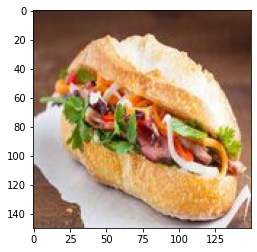

In [ ]:
test_image = image.load_img('/content/gdrive/MyDrive/CNN1/food/validation/banhmi/banhmitest.jpg')
img = image.img_to_array(test_image)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kqua = np.argmax(model_CNN.predict(img),axis=1)
print(kqua)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/gdrive/MyDrive/CNN1/food/validation/banhmi/banhmitest.jpg')
imgplot = plt.imshow(img)
plt.show()

[1]


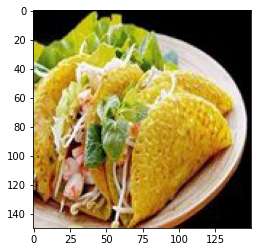

In [ ]:
test_image = image.load_img('/content/gdrive/MyDrive/CNN1/food/validation/banhxeo/image 51.jpg')
img = image.img_to_array(test_image)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kqua = np.argmax(model_CNN.predict(img),axis=1)
print(kqua)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/gdrive/MyDrive/CNN1/food/validation/banhxeo/image 51.jpg')
imgplot = plt.imshow(img)
plt.show()

[2]


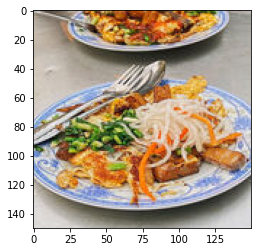

In [ ]:
test_image = image.load_img('/content/gdrive/MyDrive/CNN1/food/validation/botchien/bot.jpg')
img = image.img_to_array(test_image)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kqua = np.argmax(model_CNN.predict(img),axis=1)
print(kqua)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/gdrive/MyDrive/CNN1/food/validation/botchien/bot.jpg')
imgplot = plt.imshow(img)
plt.show()

[3]


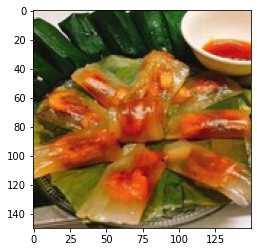

In [ ]:
test_image = image.load_img('/content/gdrive/MyDrive/CNN1/food/validation/botloc/bot1.jpg')
img = image.img_to_array(test_image)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kqua = np.argmax(model_CNN.predict(img),axis=1)
print(kqua)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/gdrive/MyDrive/CNN1/food/validation/botloc/botl.jpg')
imgplot = plt.imshow(img)
plt.show()

[4]


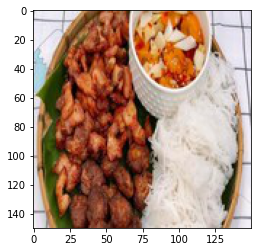

In [ ]:
test_image = image.load_img('/content/gdrive/MyDrive/CNN1/food/validation/buncha/bunc(l).jpg')
img = image.img_to_array(test_image)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kqua = np.argmax(model_CNN.predict(img),axis=1)
print(kqua)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/gdrive/MyDrive/CNN1/food/validation/buncha/bunc(l).jpg')
imgplot = plt.imshow(img)
plt.show()

[5]


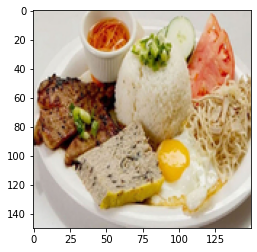

In [ ]:
test_image = image.load_img('/content/gdrive/MyDrive/CNN1/food/validation/comtam/image 51.jpg')
img = image.img_to_array(test_image)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kqua = np.argmax(model_CNN.predict(img),axis=1)
print(kqua)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/gdrive/MyDrive/CNN1/food/validation/comtam/image 51.jpg')
imgplot = plt.imshow(img)
plt.show()

[6]


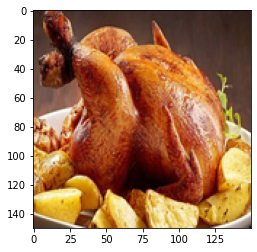

In [ ]:
test_image = image.load_img('/content/gdrive/MyDrive/CNN1/food/validation/ganuong/image 51.jpg')
img = image.img_to_array(test_image)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kqua = np.argmax(model_CNN.predict(img),axis=1)
print(kqua)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/gdrive/MyDrive/CNN1/food/validation/ganuong/image 51.jpg')
imgplot = plt.imshow(img)
plt.show()

[7]


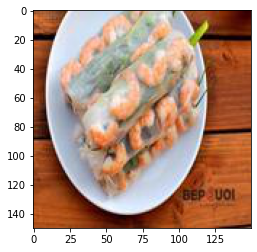

In [ ]:
test_image = image.load_img('/content/gdrive/MyDrive/CNN1/food/validation/goicuon/goi(1).jpg')
img = image.img_to_array(test_image)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kqua = np.argmax(model_CNN.predict(img),axis=1)
print(kqua)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/gdrive/MyDrive/CNN1/food/validation/goicuon/goi(1).jpg')
imgplot = plt.imshow(img)
plt.show()

[9]


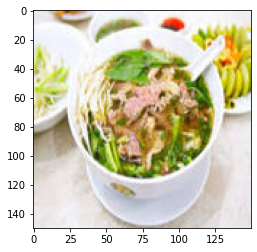

In [ ]:
test_image = image.load_img('/content/gdrive/MyDrive/CNN1/food/validation/pho/image 51.jpg')
img = image.img_to_array(test_image)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kqua = np.argmax(model_CNN.predict(img),axis=1)
print(kqua)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/gdrive/MyDrive/CNN1/food/validation/pho/image 51.jpg')
imgplot = plt.imshow(img)
plt.show()

[8]


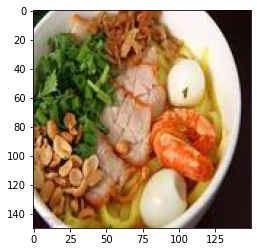

In [ ]:
test_image = image.load_img('/content/gdrive/MyDrive/CNN1/food/validation/miquang/images1.jpg')
img = image.img_to_array(test_image)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kqua = np.argmax(model_CNN.predict(img),axis=1)
print(kqua)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/gdrive/MyDrive/CNN1/food/validation/miquang/images1.jpg')
imgplot = plt.imshow(img)
plt.show()